# Neural Network (Feedforward) for heart disease data (low/hight risk)

In [ ]:
import pandas as pd
import numpy as np
import os
import sys

import matplotlib.pyplot as plt

from matplotlib.figure import Figure

from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, accuracy_score, mean_squared_error, classification_report, confusion_matrix

In [18]:
module_path = os.path.abspath(os.path.join("..", "common"))

if module_path not in sys.path:
    sys.path.append(module_path)

from common import kUtils

In [19]:
data_path = os.path.join('..', 'data', 'heart_disease_risk_dataset_earlymed.csv')

df = pd.read_csv(data_path)
df.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.499229,0.500586,0.498571,0.498729,0.501414,0.498929,0.501500,0.502457,0.497429,0.499214,0.500643,0.502971,0.499157,0.503543,0.497629,0.499957,0.548929,54.461986,0.500000
std,0.500003,0.500003,0.500002,0.500002,0.500002,0.500002,0.500001,0.499998,0.499997,0.500003,0.500003,0.499995,0.500003,0.499991,0.499998,0.500004,0.497604,16.410794,0.500004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,56.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,1.000000


In [20]:
scaler = StandardScaler()
df["Age"] = scaler.fit_transform(df[["Age"]])

X = df.drop(columns=["Heart_Risk"]).values
y = df["Heart_Risk"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
clf = MLPClassifier(solver="adam", alpha=1e-5, hidden_layer_sizes=(16,8), activation="relu", random_state=42, max_iter=200)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16, 8), random_state=42)

In [22]:
y_pred: np.ndarray = clf.predict(X_test)

score: float = clf.score(X=X_test, y=y_test)
accuracy: float = accuracy_score(y_true=y_test, y_pred=y_pred)
mse: float | np.ndarray = mean_squared_error(y_true=y_test, y_pred=y_pred)
c_report: str | dict = classification_report(y_true=y_test, y_pred=y_pred)
c_matrix: np.ndarray = confusion_matrix(y_true=y_test, y_pred=y_pred)

print("Score:", score)
print("Accuracy:", accuracy)
print("Mean squared error:", mse)
print("Classification report:\n", c_report)
print("Confusion matrix:\n", c_matrix)

Score: 0.9925
Accuracy: 0.9925
Mean squared error: 0.0075
Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      7000
         1.0       0.99      0.99      0.99      7000

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000

Confusion matrix:
 [[6953   47]
 [  58 6942]]


In [37]:
pca: PCA = PCA(n_components=2)
X_pca: np.ndarray = pca.fit_transform(X_train)

**NOTE:** The next part describes how much the 2 PC's explain of the variance. This is not necessarily important. What is important is that it can be visualised what a decision boundary of a neural network could look like. Of course, this is not the actual decision boundary, but it will hopefully give you an idea of the weird structure a neural network can take.

In [38]:
explained_variance: np.ndarray = pca.explained_variance_ratio_ * 100
print(f"PC1 explains {explained_variance[0]:.2f}% of the variance")
print(f"PC2 explains {explained_variance[1]:.2f}% of the variance")
print(f"Variance explained by all principal components: {pca.explained_variance_ratio_.sum() * 100:.2f}")

PC1 explains 33.41% of the variance
PC2 explains 9.28% of the variance
Variance explained by all principal components: 42.69


We need a new classifier to be able to represent the 2D decision boundary.

In [39]:
clf_2d = MLPClassifier(solver="adam", alpha=1e-5, hidden_layer_sizes=(16,8), activation="relu", random_state=42, max_iter=200)
clf_2d.fit(X_pca, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16, 8), random_state=42)

In [42]:
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]

probs = clf_2d.predict_proba(grid_points)[:, 1].reshape(xx.shape)

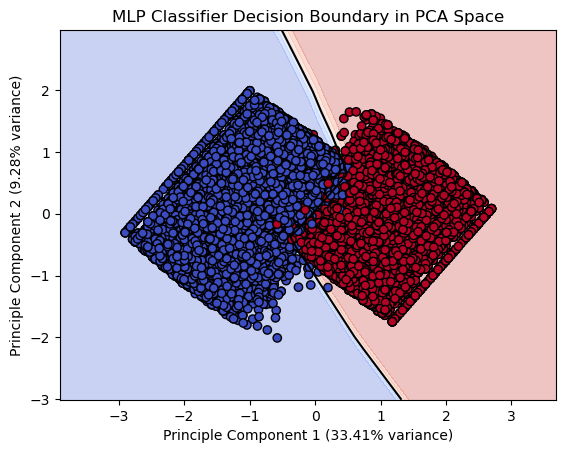

In [47]:
fig: Figure; ax: plt.Axes;

fig, ax = plt.subplots()

contourf = ax.contourf(xx, yy, probs, cmap=plt.cm.coolwarm, alpha=0.3)
decision_boundary = ax.contour(xx, yy, probs, levels=[0.5], colors="k", linestyles="-")
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, edgecolor="k", cmap=plt.cm.coolwarm)

ax.set_xlabel("Principle Component 1 (33.41% variance)")
ax.set_ylabel("Principle Component 2 (9.28% variance)")
ax.set_title("MLP Classifier Decision Boundary in PCA Space")

plt.show()